In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("/Users/maggie/Documents/Bioinfo/Bioinfo-Simulation/latimes-county-totals.csv")

In [3]:
df_la = df[df['county'] == 'Los Angeles']

In [4]:
df_la = df_la.drop(['fips','county','date'], axis=1)

In [5]:
days = list(range(1,len(df_la)+1))
df_la['culm_day'] = days

In [6]:
df_la = df_la.fillna(0)
df_la

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
867,1,0,0.0,0.0,1
868,1,0,0.0,0.0,2
869,1,0,0.0,0.0,3
870,1,0,0.0,0.0,4
871,1,0,0.0,0.0,5
...,...,...,...,...,...
962,23233,1119,711.0,54.0,96
963,24262,1174,1029.0,55.0,97
964,24936,1212,674.0,38.0,98
965,25699,1231,763.0,19.0,99


In [7]:
X = df_la.drop(['deaths'], axis=1)
y = df_la['deaths']

In [8]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [ ]:
## use curve_fit to autmatically find the best value for parameters a,b,c

In [9]:
fit = curve_fit(logistic_model,df_la['culm_day'],df_la['deaths'])
fit

(array([   7.31697654,   88.32733981, 1508.02969956]),
 array([[9.98672842e-03, 1.91030618e-02, 1.58227766e+00],
        [1.91030618e-02, 4.87863661e-02, 3.92206764e+00],
        [1.58227766e+00, 3.92206764e+00, 3.31803414e+02]]))

In [18]:
##create extra 100 days to see the data
days = list(range(101,201))
new_culm = pd.DataFrame(days)
new_culm

,0
0,101
1,102
2,103
3,104
4,105
...,...
95,196
96,197
97,198
98,199


In [19]:
result = logistic_model(df_la['culm_day'],7.31697654,88.32733981,1508.02969956)

In [20]:
## predcit death for the extra 100 days
result_new_culm = logistic_model(new_culm,7.31697654,88.32733981,1508.02969956)

<Figure size 432x288 with 0 Axes>

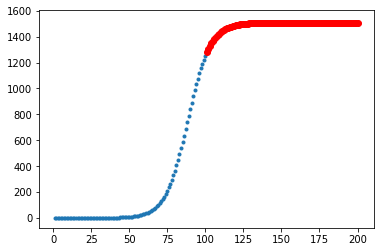

In [21]:
plt.clf()
fit = plt.figure()
# plot x = day, y = actual death
plt.scatter(x=df_la['culm_day'] , y = result, marker = '.' )

#plot for the extra 100 days
plt.scatter(x=new_culm , y = result_new_culm, color = 'red' )

In [ ]:
# new_culm_day = [91,92,93,94,95,96,97,98,99,100]
# df_newculm = pd.DataFrame(new_culm_day,columns=['new_Culm'])
# type(df_newculm)

In [ ]:
# logistic_model(df_newculm,7.31697654,88.32733981,1508.02969956)